# GW170817 - Analysing the Gravitational Wave Signal

(adapted from https://notebooks.azure.com/stuver/projects/AAPT-WM19/html/AAPT-WM19-Stuver.ipynb)

The file GW170817.txt contains strain data for the graviational wave signal GW170817:
* the first column is time
* the second is the measured strain

Let's take a look:

232609


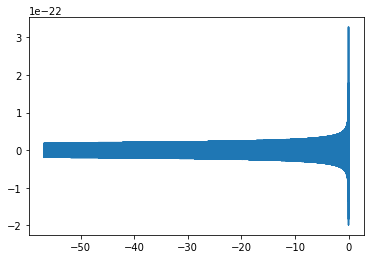

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

t, h = np.loadtxt("GW170817.txt", unpack = True)
print(len(t))
plt.plot(t, h)

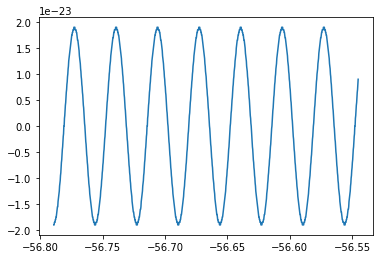

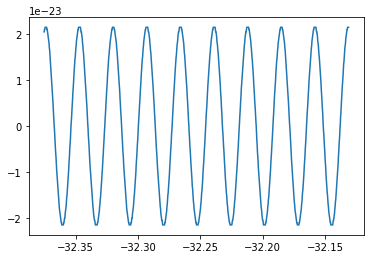

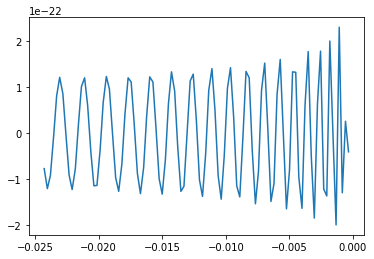

In [8]:

plt.plot(t[0:1000], h[0:1000])
plt.show()
plt.plot(t[100000:101000], h[100000:101000])
plt.show()
plt.plot(t[-100:-1], h[-100:-1])

Some comments on the data:
* Amplitude is increasing
* frequency is increasing

This suggests that we have a two objects in orbit, and:
* The radius of the orbit is decreasing (accelerating faster)
* From Kepler's third law, this also implies a smaller period

Kepler:
$$
P_{orb}^2 = R^3 \frac{4\pi^2}{G (m_1 + m_2)}
$$

(Careful:  P_orb is not the same as the period of the graviational waves.  
$$
P_{orb}  = 2P_{GW}
$$

Now some gravitational wave physics:

"Chirp mass":

$$
M_c = \frac{(m_1 m_2)^{3/5}}{(m_1 + m_2)^{1/5}}
$$

The chirp mass can be found from the frequency change:
$$
M_c = \frac{c^3}{G} [ ( \frac{5}{96})^3 \pi^{-8} f^{-11} \dot{f}^3 ] ^{1/5}
$$

Or, integrating,
$$
f^{-8/3} = -\frac{(8\pi)^{5/3}}{5} (\frac{GM_c}{c^3}) t
$$
So we can calculate the chirp mass from the slope of $f^{-8/3}$ vs $t$ (call it $s$):
$$
M_c = \frac{c^3}{G (8\pi)^{8/5}} (-5s)^{3/5}
$$

[     0      1      2 ... 232603 232605 232607]
[1 1 1 ... 1 2 2]
[    32     99    166 ... 114705 114707 114708]
[    32    169    305 ... 232600 232603 232605]
[-5.678111e+01 -5.674766e+01 -5.671446e+01 ... -1.820000e-03 -1.080000e-03
 -5.900000e-04]
[0.03345 0.0332  0.03345 ... 0.00097 0.00074 0.00049]


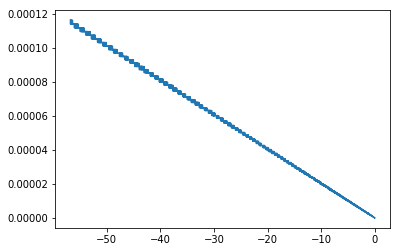

In [22]:
# find indices of all the negative values of strain
ndx_neg = np.where(h != abs(h))[0]
print(ndx_neg)

# find the interval between the indices of the negative numbers
diff_ndx = np.diff(ndx_neg)
print(diff_ndx)

# find the last negative value in every interval
last_neg = np.where(diff_ndx > 1)[0]
print(last_neg)

# index of the beginning of each period
ndx_period = ndx_neg[last_neg]
print(ndx_period)

t_period = t[ndx_period]
print(t_period)

Pgw = np.diff(t_period)
print(Pgw)
t_period = t_period[1:]
#plt.plot(t_period, Pgw)

f = 1/Pgw
plt.plot(t_period, f**(-8.0/3.0))

In [27]:

f83 = f**(-8.0/3.0)
from scipy.stats import linregress
slope, intercept, rvalue, pvalue, stderr = linregress(t_period, f83)
print(slope)

G = 6.67408e-11
c = 299792458
Msun = 1.989e30

Mc = c**3 * G**(-1) * (8 * np.pi)**(-8.0/5.0) * (-5 * slope)**(3.0/5.0)
print(Mc)
Mc /= Msun
print(Mc)

-2.0260965101441923e-06
2.3391873403719877e+30
1.176062011247857


Now we have to guess at one of the masses:  suppose $m_1 = 1.4$ Msun.  Rearrange the chirp mass equation for $m_2$:
$$
(1/M_c^5) m_2^3 + (0) m_2^2 + (-1/m_1^3)m_2 + (-1/m_1^2) = 0
$$


[ 1.30392954+0.j         -0.65196477+0.67473153j -0.65196477-0.67473153j]


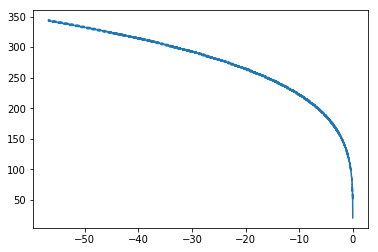

In [30]:
m1 = 1.4

a = 1/Mc**5.0
b = 0.0
c = -1.0 / m1**3
d = -1.0 / m1**2

m2 = np.roots([a, b, c, d])
print(m2)

m2 = 1.30392
Porb = 2* Pgw
Mtot = (m1 + m2) * Msun
R = (G * Mtot * (Porb / (2*np.pi))**2 )**(1/3)

plt.plot(t_period, R/1000)